In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('sales_data python.csv')
print(df.head())

         Date  Store     Category  Units_Sold  Unit_Price
0  2024-01-01    101  Electronics          30      299.99
1  2024-01-01    102     Clothing          45       49.99
2  2024-01-01    103   Home Goods          20       19.99
3  2024-01-02    101  Electronics          25      299.99
4  2024-01-02    102     Clothing          50       49.99


In [4]:
df.shape

(129, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129 entries, 0 to 128
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        129 non-null    object 
 1   Store       129 non-null    int64  
 2   Category    129 non-null    object 
 3   Units_Sold  129 non-null    int64  
 4   Unit_Price  129 non-null    float64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.2+ KB


In [6]:
df.describe()

,Store,Units_Sold,Unit_Price
count,129.000000,129.000000,129.000000
mean,102.015504,35.341085,121.152791
std,0.819532,13.112790,125.353425
min,101.000000,15.000000,19.990000
25%,101.000000,25.000000,19.990000
50%,102.000000,32.000000,49.990000
75%,103.000000,45.000000,299.990000
max,103.000000,62.000000,299.990000


In [7]:
df.columns.to_list()

['Date', 'Store', 'Category', 'Units_Sold', 'Unit_Price']

In [8]:
df.isnull().sum()

Date          0
Store         0
Category      0
Units_Sold    0
Unit_Price    0
dtype: int64

In [9]:
#valores duplicados
df.nunique()

Date          20
Store          3
Category       3
Units_Sold    24
Unit_Price     3
dtype: int64

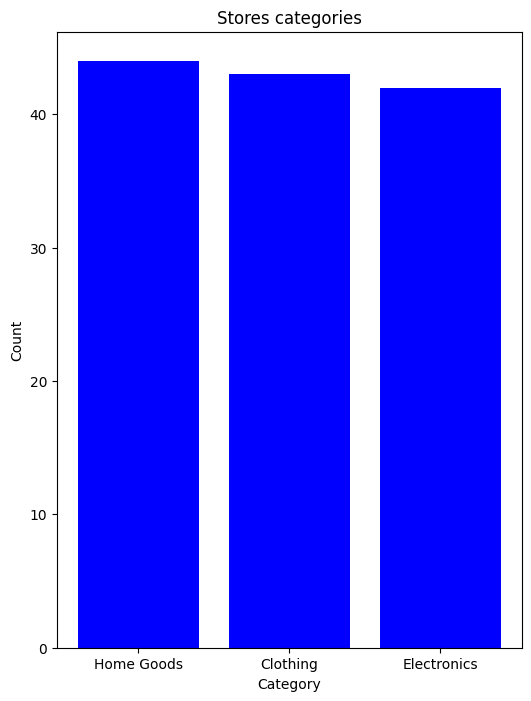

In [10]:
#plot the categories

categories_counts = df['Category'].value_counts()

plt.figure(figsize=(6,8))
plt.bar(categories_counts.index, categories_counts,color='b')
plt.title("Stores categories")
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

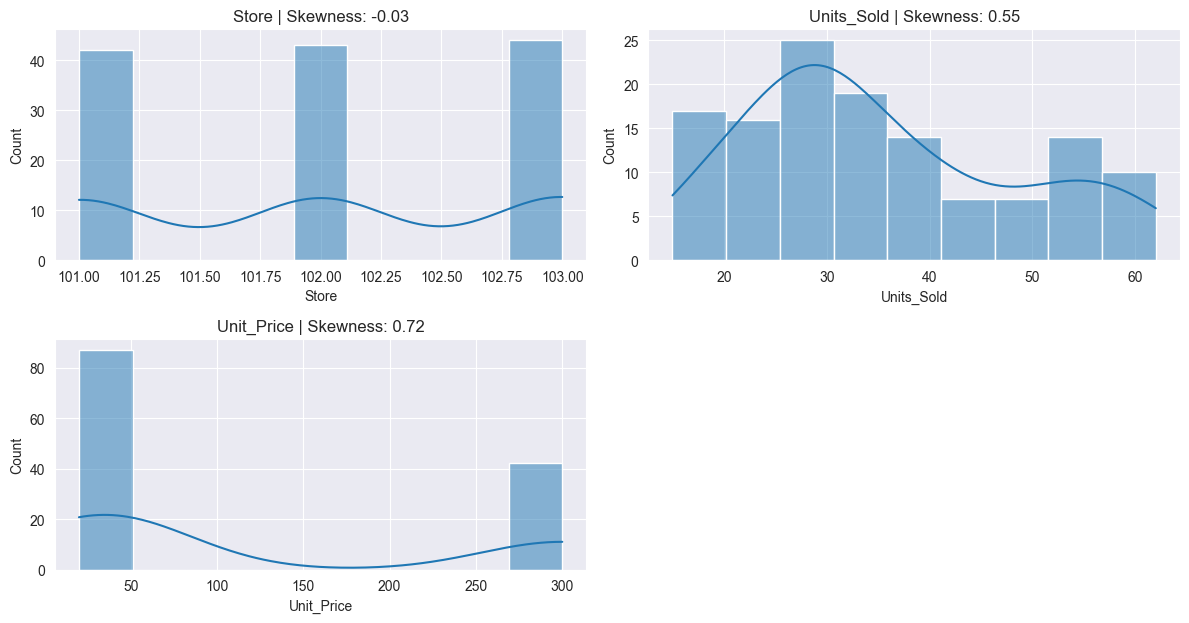

In [11]:
#kernel de densidad para comprender la varianza en el dataset
sns.set_style("darkgrid")

numerical_columns = df.select_dtypes(include=['int64','float64']).columns

plt.figure(figsize=(12, len(numerical_columns) * 3))
for idx, feature in enumerate(numerical_columns, 1):
    plt.subplot(len(numerical_columns), 2, idx)
    sns.histplot(df[feature], kde=True)
    plt.title(f"{feature} | Skewness: {round(df[feature].skew(), 2)}")

plt.tight_layout()
plt.show()

C:\Users\Usuario\AppData\Local\Temp\ipykernel_14684\1470865050.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(title='Categories')


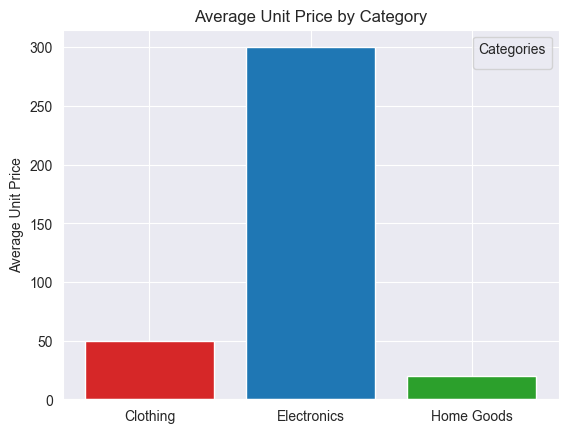

In [12]:
categories = df['Category'].value_counts()
data = df.groupby('Category')['Unit_Price'].mean()
fig, ax = plt.subplots()
bar_labels = data.index
bar_colors = ['tab:red', 'tab:blue', 'tab:green', 'tab:orange']

ax.bar(bar_labels, data, color=bar_colors)

ax.set_ylabel('Average Unit Price')
ax.set_title('Average Unit Price by Category')
ax.legend(title='Categories')

plt.show()

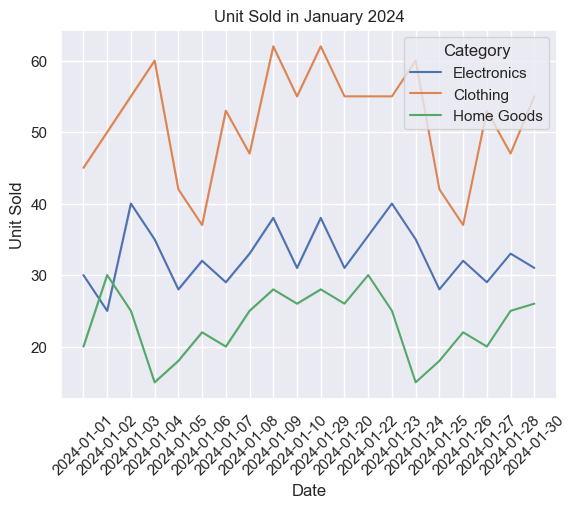

In [13]:
sns.set_theme(style='darkgrid')

sns.lineplot(x='Date', y='Units_Sold', hue='Category', data=df)
plt.title('Unit Sold in January 2024')
plt.xlabel('Date')
plt.ylabel('Unit Sold')
plt.xticks(rotation=45)
plt.show()

In [14]:
cant_duplicated = df.duplicated()
print (cant_duplicated)

0      False
1      False
2      False
3      False
4      False
       ...  
124     True
125     True
126     True
127     True
128     True
Length: 129, dtype: bool


In [15]:
data_duplicated = df.drop_duplicates()
print(data_duplicated)

           Date  Store     Category  Units_Sold  Unit_Price
0    2024-01-01    101  Electronics          30      299.99
1    2024-01-01    102     Clothing          45       49.99
2    2024-01-01    103   Home Goods          20       19.99
3    2024-01-02    101  Electronics          25      299.99
4    2024-01-02    102     Clothing          50       49.99
5    2024-01-02    103   Home Goods          30       19.99
6    2024-01-03    101  Electronics          40      299.99
7    2024-01-03    102     Clothing          55       49.99
8    2024-01-03    103   Home Goods          25       19.99
9    2024-01-04    101  Electronics          35      299.99
10   2024-01-04    102     Clothing          60       49.99
11   2024-01-04    103   Home Goods          15       19.99
12   2024-01-05    101  Electronics          28      299.99
13   2024-01-05    102     Clothing          42       49.99
14   2024-01-05    103   Home Goods          18       19.99
15   2024-01-06    101  Electronics     

In [16]:
duplicated_rows = df[df.duplicated()]

print ("Duplicated data")
print (duplicated_rows)

Duplicated data
           Date  Store     Category  Units_Sold  Unit_Price
30   2024-01-02    103   Home Goods          30       19.99
31   2024-01-03    101  Electronics          40      299.99
32   2024-01-03    102     Clothing          55       49.99
33   2024-01-03    103   Home Goods          25       19.99
34   2024-01-04    101  Electronics          35      299.99
..          ...    ...          ...         ...         ...
124  2024-01-09    101  Electronics          38      299.99
125  2024-01-09    102     Clothing          62       49.99
126  2024-01-09    103   Home Goods          28       19.99
127  2024-01-10    101  Electronics          31      299.99
128  2024-01-10    102     Clothing          55       49.99

[71 rows x 5 columns]


In [17]:
df.drop_duplicates(inplace=True)
print(df)

           Date  Store     Category  Units_Sold  Unit_Price
0    2024-01-01    101  Electronics          30      299.99
1    2024-01-01    102     Clothing          45       49.99
2    2024-01-01    103   Home Goods          20       19.99
3    2024-01-02    101  Electronics          25      299.99
4    2024-01-02    102     Clothing          50       49.99
5    2024-01-02    103   Home Goods          30       19.99
6    2024-01-03    101  Electronics          40      299.99
7    2024-01-03    102     Clothing          55       49.99
8    2024-01-03    103   Home Goods          25       19.99
9    2024-01-04    101  Electronics          35      299.99
10   2024-01-04    102     Clothing          60       49.99
11   2024-01-04    103   Home Goods          15       19.99
12   2024-01-05    101  Electronics          28      299.99
13   2024-01-05    102     Clothing          42       49.99
14   2024-01-05    103   Home Goods          18       19.99
15   2024-01-06    101  Electronics     

In [18]:
duplicated = df.info()
print(duplicated)

<class 'pandas.core.frame.DataFrame'>
Index: 58 entries, 0 to 109
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        58 non-null     object 
 1   Store       58 non-null     int64  
 2   Category    58 non-null     object 
 3   Units_Sold  58 non-null     int64  
 4   Unit_Price  58 non-null     float64
dtypes: float64(1), int64(2), object(2)
memory usage: 2.7+ KB
None


In [19]:
df['Date'] = pd.to_datetime(df['Date'])
print(df.dtypes)

Date          datetime64[ns]
Store                  int64
Category              object
Units_Sold             int64
Unit_Price           float64
dtype: object


In [20]:
print(df.describe())

                                Date       Store  Units_Sold  Unit_Price
count                             58   58.000000   58.000000   58.000000
mean   2024-01-15 05:22:45.517241344  102.017241   35.413793  121.541724
min              2024-01-01 00:00:00  101.000000   15.000000   19.990000
25%              2024-01-05 06:00:00  101.000000   26.000000   19.990000
50%              2024-01-10 00:00:00  102.000000   31.500000   49.990000
75%              2024-01-25 18:00:00  103.000000   44.250000  299.990000
max              2024-01-30 00:00:00  103.000000   62.000000  299.990000
std                              NaN    0.826987   13.034414  126.252347


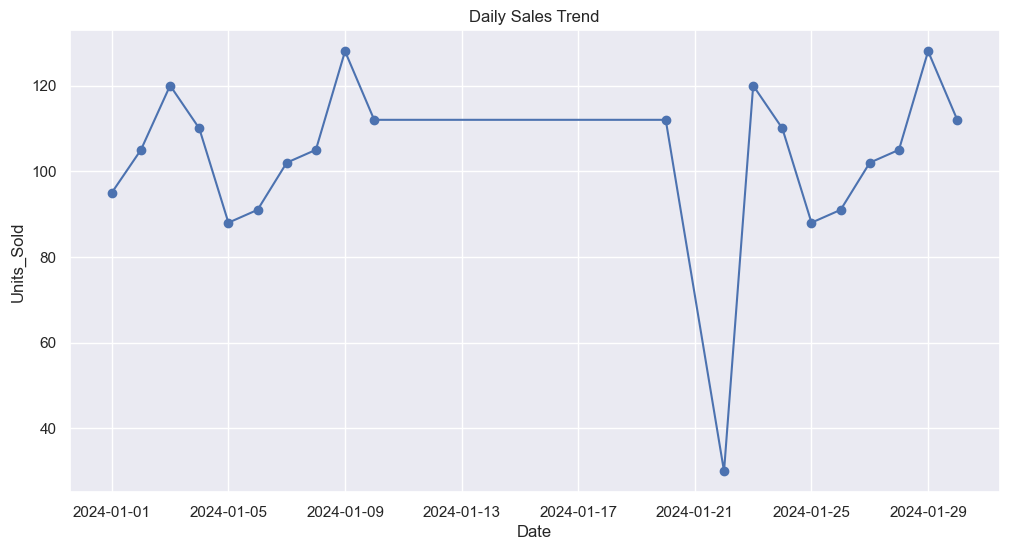

In [21]:
daily_sales = df.groupby('Date')['Units_Sold'].sum()

plt.figure(figsize=(12,6))
plt.plot(daily_sales.index, daily_sales.values, marker='o', linestyle='-')
plt.title('Daily Sales Trend')
plt.xlabel('Date')
plt.ylabel('Units_Sold')
plt.grid(True)
plt.show()

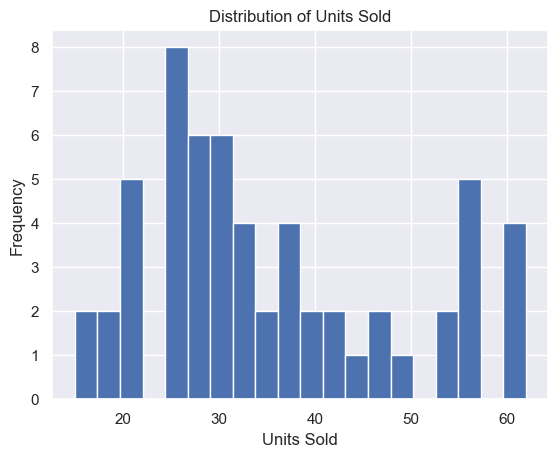

In [ ]:
plt.hist(df['Units_Sold'], bins=20)
plt.xlabel('Units Sold')
plt.ylabel('Frequency')
plt.title('Distribution of Units Sold')
plt.show()

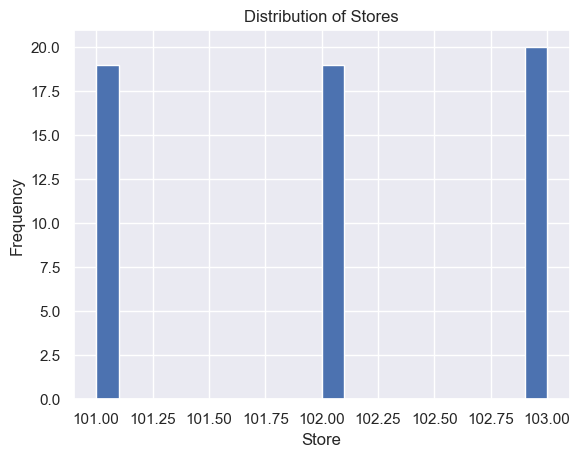

In [ ]:
plt.hist(df['Store'], bins=20)
plt.xlabel('Store')
plt.ylabel('Frequency')
plt.title('Distribution of Stores')
plt.show()